Support Vector Regression ---
===

* 0:00 min | Última modificación: Septiembre 27, 2021 | [YouTube]

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

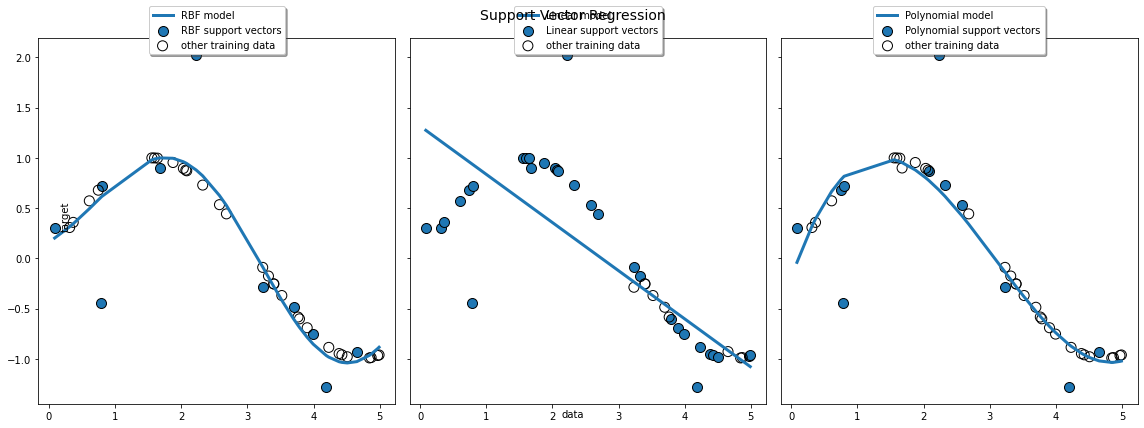

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR

#
# Datos de la muestra de entrenamiento
#
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))


#
# Modelos
#
svr_rbf = SVR(
    # -----------------------------------------------------
    # 'linear, 'poly, 'rbf', 'sigmoid'
    kernel="rbf",
    # -----------------------------------------------------
    # Regularization parameter.
    C=100,
    # -----------------------------------------------------
    # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    # por defecto 1 / n_features
    gamma=0.1,
    # -----------------------------------------------------
    # Epsilon in the epsilon-SVR model. It specifies the
    # epsilon-tube within which no penalty is associated in
    # the training loss function with points predicted
    # within a distance epsilon from the actual value.
    epsilon=0.1,
)

svr_lin = SVR(
    # -----------------------------------------------------
    # 'linear, 'poly, 'rbf', 'sigmoid'
    kernel="linear",
    # -----------------------------------------------------
    # Regularization parameter.
    C=100,
    # -----------------------------------------------------
    # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    # por defecto 1 / n_features
    gamma="auto",
)


svr_poly = SVR(
    # -----------------------------------------------------
    # 'linear, 'poly, 'rbf', 'sigmoid'
    kernel="poly",
    # -----------------------------------------------------
    # Regularization parameter.
    C=100,
    # -----------------------------------------------------
    # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    # por defecto 1 / n_features
    gamma="auto",
    # -----------------------------------------------------
    # Degree of the polynomial kernel function (‘poly’).
    degree=3,
    # -----------------------------------------------------
    # Epsilon in the epsilon-SVR model. It specifies the
    # epsilon-tube within which no penalty is associated in
    # the training loss function with points predicted
    # within a distance epsilon from the actual value.
    epsilon=0.1,
    # -----------------------------------------------------
    # Independent term in kernel function. It is only
    # significant in ‘poly’ and ‘sigmoid’.
    coef0=1,
)


lw = 3

svrs = [
    svr_rbf,
    svr_lin,
    svr_poly,
]

kernel_label = [
    "RBF",
    "Linear",
    "Polynomial",
]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)

for ix, svr in enumerate(svrs):

    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color="tab:blue",
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )

    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="tab:blue",
        edgecolor="k",
        s=100,
        label="{} support vectors".format(kernel_label[ix]),
    )

    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=100,
        label="other training data",
    )

    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.tight_layout()
plt.show()